При решении задачи методом Розенброка (методом вращающихся координат) используется преобразование на каждой итерации системы координат таким образом, чтобы в новой системе координат одна из осей совпадала с направлением предыдущего шага. Остальные оси новой системы координат обычно находят с помощью процедуры ортогонализации Грамма-Шмидта.

In [1]:
import numpy as np

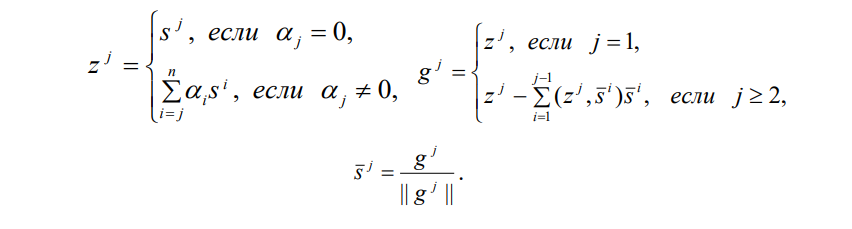

In [2]:
def gram_schmidt(vectors, alpha):
    '''
    Процесс Грама — Шмидта позволяет построить ортонормированный базис в каждом евклидовом пространстве.
    '''
    # преобразование s -> z
    vectors = [np.dot(alpha[j:], vectors[j:]) if alpha[j] != 0 else vectors[j] for j in range(len(alpha))]
    
    num_vectors = len(vectors)
    basis = np.zeros_like(vectors)
    
    # преобразование z -> g -> s_верхняя черта
    for i in range(num_vectors):
        basis[i] = vectors[i]
        for j in range(i):
            projection = np.dot(vectors[i], basis[j]) / np.dot(basis[j], basis[j]) * basis[j]
            basis[i] -= projection
        # нормализация
        basis[i] = basis[i] / np.linalg.norm(basis[i])
    
    return basis


v1 = np.array([1, 2, 3], dtype=float)
v2 = np.array([2, 3, 4], dtype=float)
v3 = np.array([3, 4, 6], dtype=float)

vectors = np.array([v1, v2, v3])
a = np.array([0, 1, 2])
basis = gram_schmidt(vectors, a)
print(basis)

# Провеяем ортогональность матрицы
dot_product = np.dot(basis, basis.T)
is_orthogonal = np.allclose(dot_product, np.eye(3))

# Проверяем нормированность векторов
norms = np.linalg.norm(basis, axis=1)
is_normalized = np.allclose(norms, np.ones(3))

print("Базис является ортонормированным:", is_orthogonal and is_normalized)

[[ 0.26726124  0.53452248  0.80178373]
 [ 0.95784149 -0.05634362 -0.28171808]
 [ 0.10540926 -0.84327404  0.52704628]]
Базис является ортонормированным: True


In [3]:
def rosenbrock(f, x0, eps=1e-2, eta=2, beta=-0.5, delta=0.5):
    '''
    x0 - начальная точка
    eps - для остановки алгоритма
    eta (> 1) - коэффициент растяжения
    beta (-1, 0) - коэффициент сжатия
    delta - начальная длина шага вдоль каждого из направлений
    '''
    # размерность пространства
    n = len(x0)
    # координатные направления
    s = np.eye(n)
    # переменная, регистрирующая последний удачный шаг
    x = np.array(x0, dtype=float)
    # текущая точка минимума (регистриует все шаги - удачные и неудачные)
    y = x.copy()
    # шаг вдоль каждого направления
    delta = np.full(n, delta)

    while True:
        y_pred = y.copy()
        # шаг 1 - изменения значения шага delta и точки y с помощью коэфф eta или beta
        # eta - успешный шаг, beta - неудачный шаг
        for j in range(n):
            y_candidate = y + delta[j] * s[j]
            condition = f(*y_candidate) < f(*y)
            y = y_candidate if condition else y
            delta[j] *= eta if condition else beta
        # если каждый из n последних спусков по направлению был неудачным
        if f(*y) == f(*y_pred):
            # если, по крайней мере, один удачный спуск встретился в результате нескольких проходов 1-го шага
            if f(*y) < f(*x):
                if np.linalg.norm(y - x) >= eps:
                    # вычисляем коэффициенты разложения вектора y-x по базису s
                    alpha = np.linalg.solve(s, y - x)
                    # строим новые направления с помощью процедуры Грама-Шмидта
                    s = gram_schmidt(s, alpha)
                    x = y.copy()
                else:
                    # x - приближенное оптимальное значение
                    x = y.copy()
                    break
            # если f(*y) == f(*x) и не было ни одного удачного спуска по направлению
            # и если |delta_j|< eps для всех j, то x - приближенное оптимальное значение, то остановиться
            elif np.all(np.abs(delta) < eps):
                break
    return x

f = lambda x, y : x**2 + x*y + 2*y**2 + x - y

answer = rosenbrock(f, [0, 0])
print(f"Минимальное значение в точке: ({answer[0]:3f}, {answer[1]:3f}, {f(*answer):3f})")

Минимальное значение в точке: (-0.719053, 0.431569, -0.571402)
